In [1]:
# start tensorflow interactiveSession                              
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import random

filename = 'E:/Alibaba German AI Challenge/data_process/data.npy'

data = np.load(filename)
print('The shape of data is ',data.shape)

sess = tf.InteractiveSession()

#####################################################     Net Define     ##################################################### 

# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Create the model
# placeholder
x = tf.placeholder("float", [None, 18432])
y_ = tf.placeholder("float", [None, 17])


# first convolutinal layer
w_conv1_1 = weight_variable([3, 3, 18, 64])
b_conv1_1 = bias_variable([64])

x_image = tf.reshape(x, [-1, 32, 32, 18])

w_conv1_2 = weight_variable([3, 3, 64, 64])
b_conv1_2 = bias_variable([64])

h_conv1_1 = tf.nn.relu(conv2d(x_image, w_conv1_1) + b_conv1_1)
h_conv1_2 = tf.nn.relu(conv2d(h_conv1_1, w_conv1_2) + b_conv1_2)
h_pool1 = max_pool_2x2(h_conv1_1)

# second convolutional layer
w_conv2_1 = weight_variable([3, 3, 64, 64])
b_conv2_1 = bias_variable([64])

w_conv2_2 = weight_variable([3, 3, 64, 64])
b_conv2_2 = bias_variable([64])

h_conv2_1 = tf.nn.relu(conv2d(h_pool1, w_conv2_1) + b_conv2_1)
h_conv2_2 = tf.nn.relu(conv2d(h_conv2_1, w_conv2_2) + b_conv2_2)
h_pool2 = max_pool_2x2(h_conv2_2)

# densely connected layer
w_fc1 = weight_variable([8*8*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
w_fc2 = weight_variable([1024, 17])
b_fc2 = bias_variable([17])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# train and evaluate the model
#交叉熵作为损失函数
delta = 1e-7
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv+delta))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.global_variables_initializer())


#####################################################       Train     ##################################################### 


##随机抽取一部分作为一个mini-batch
def get_batch(data, batch_size):
    sample = random.sample(list(data),batch_size)
    sample = np.array(sample)
    train_x = sample[:,:-17]
    train_y = sample[:,-17:]
    
    return train_x, train_y

Loss = []

batch_size = 1000
for i in range(20000):
    batch_x,batch_y = get_batch(data,batch_size)
    train_step.run(feed_dict={x:batch_x, y_:batch_y, keep_prob:0.5})
    loss_temp = cross_entropy.eval(feed_dict={x:batch_x, y_:batch_y, keep_prob:1.0})
    Loss.append(loss_temp)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch_x, y_:batch_y, keep_prob:1.0})
        print ("step %d, train accuracy %g, train loss %f" %(i,  train_accuracy, loss_temp))



The shape of data is  (50989, 18449)
step 0, train accuracy 0.102, train loss 12395.158203
step 200, train accuracy 0.353, train loss 2521.895508
step 400, train accuracy 0.458, train loss 2030.161621
step 600, train accuracy 0.484, train loss 1900.529053
step 800, train accuracy 0.48, train loss 1632.001221
step 1000, train accuracy 0.513, train loss 1520.481079
step 1200, train accuracy 0.532, train loss 1416.726196
step 1400, train accuracy 0.565, train loss 1332.280273
step 1600, train accuracy 0.578, train loss 1278.763794
step 1800, train accuracy 0.572, train loss 1291.292969
step 2000, train accuracy 0.599, train loss 1211.583374
step 2200, train accuracy 0.605, train loss 1244.936523
step 2400, train accuracy 0.624, train loss 1133.782471
step 2600, train accuracy 0.631, train loss 1166.313965
step 2800, train accuracy 0.642, train loss 1056.976807
step 3000, train accuracy 0.631, train loss 1063.520630
step 3200, train accuracy 0.657, train loss 1036.327515
step 3400, train a

In [2]:
vali = np.load('E:/Alibaba German AI Challenge/data_process/sample_of_training.npy')
accuracy.eval(feed_dict={x:vali[:,:-17], y_:vali[:,-17:], keep_prob:1.0})

0.63880002

In [1]:
# start tensorflow interactiveSession                              
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import random

filename = 'E:/Alibaba German AI Challenge/data_process/vali_data.npy'

data = np.load(filename)
print('The shape of data is ',data.shape)

sess = tf.InteractiveSession()

#####################################################     Net Define     ##################################################### 

# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Create the model
# placeholder
x = tf.placeholder("float", [None, 18432])
y_ = tf.placeholder("float", [None, 17])
x_image = tf.reshape(x, [-1, 32, 32, 18])

# first convolutinal layer
w_conv1_1 = weight_variable([3, 3, 18, 64])
b_conv1_1 = bias_variable([64])

w_conv1_2 = weight_variable([3, 3, 64, 128])
b_conv1_2 = bias_variable([128])

h_conv1_1 = tf.nn.relu(conv2d(x_image, w_conv1_1) + b_conv1_1)
h_conv1_2 = tf.nn.relu(conv2d(h_conv1_1, w_conv1_2) + b_conv1_2)
h_pool1 = max_pool_2x2(h_conv1_2)

# second convolutional layer
w_conv2_1 = weight_variable([3, 3, 128, 128])
b_conv2_1 = bias_variable([128])

w_conv2_2 = weight_variable([3, 3, 128, 128])
b_conv2_2 = bias_variable([128])

h_conv2_1 = tf.nn.relu(conv2d(h_pool1, w_conv2_1) + b_conv2_1)
h_conv2_2 = tf.nn.relu(conv2d(h_conv2_1, w_conv2_2) + b_conv2_2)
h_pool2 = max_pool_2x2(h_conv2_2)

# fc_1
w_fc1 = weight_variable([8*8*128, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout_1
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# fc_2
w_fc2 = weight_variable([1024, 1024])
b_fc2 = bias_variable([1024])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# dropout_2
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

# readout layer
w_fc3 = weight_variable([1024, 17])
b_fc3 = bias_variable([17])

y_conv = tf.nn.softmax(tf.matmul(h_fc2_drop, w_fc3) + b_fc3)

# train and evaluate the model
#交叉熵作为损失函数
delta = 1e-7
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv+delta))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.global_variables_initializer())


#####################################################       Train     ##################################################### 


##随机抽取一部分作为一个mini-batch
def get_batch(data, batch_size):
    sample = random.sample(list(data),batch_size)
    sample = np.array(sample)
    train_x = sample[:,:-17]
    train_y = sample[:,-17:]
    
    return train_x, train_y

Loss = []

batch_size = 1000
for i in range(30000):
    batch_x,batch_y = get_batch(data,batch_size)
    train_step.run(feed_dict={x:batch_x, y_:batch_y, keep_prob:0.5})
    loss_temp = cross_entropy.eval(feed_dict={x:batch_x, y_:batch_y, keep_prob:1.0})
    Loss.append(loss_temp)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch_x, y_:batch_y, keep_prob:1.0})
        print ("step %d, train accuracy %g, train loss %f" %(i,  train_accuracy, loss_temp))
        if train_accuracy >= 0.99:
            break



The shape of data is  (24119, 18449)
step 0, train accuracy 0.092, train loss 14185.763672
step 200, train accuracy 0.318, train loss 10909.431641
step 400, train accuracy 0.392, train loss 9721.892578
step 600, train accuracy 0.422, train loss 9072.408203
step 800, train accuracy 0.509, train loss 7472.146973
step 1000, train accuracy 0.554, train loss 6482.962402
step 1200, train accuracy 0.444, train loss 2385.441895
step 1400, train accuracy 0.488, train loss 1975.648926
step 1600, train accuracy 0.51, train loss 1806.054321
step 1800, train accuracy 0.555, train loss 1560.243408
step 2000, train accuracy 0.552, train loss 1708.118408
step 2200, train accuracy 0.558, train loss 1489.187256
step 2400, train accuracy 0.566, train loss 1452.329224
step 2600, train accuracy 0.584, train loss 1370.277588
step 2800, train accuracy 0.592, train loss 1324.396729
step 3000, train accuracy 0.592, train loss 1411.680054
step 3200, train accuracy 0.635, train loss 1323.697144
step 3400, train 

KeyboardInterrupt: 

In [2]:
vali = np.load('E:/Alibaba German AI Challenge/data_process/sample_of_training.npy')
accuracy.eval(feed_dict={x:vali[:1000,:-17], y_:vali[:1000,-17:], keep_prob:1.0})

0.542

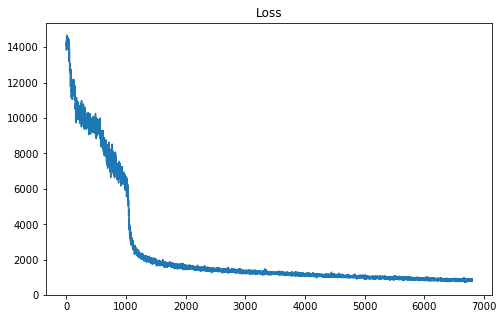

In [3]:
import matplotlib.pyplot as plt

xx = list(range(len(Loss)))

plt.figure(figsize = (8,5))
plt.plot(xx,Loss)
plt.title('Loss')
plt.show()

In [4]:
import h5py
filename = 'E:/Alibaba German AI Challenge/origin_DATA/round1_test_a_20181109.h5'
f = h5py.File(filename,'r')
test_s1 = f['sen1']
test_s2 = f['sen2']

test = []
for i in range(0,test_s1.shape[0]):
    temp1 = test_s1[i].flatten()
    temp2 = test_s2[i].flatten()
    temp = np.hstack((temp1,temp2))
    test.append(temp)
test = np.array(test)

test_y = np.zeros((test.shape[0],17))

pred = tf.argmax(y_conv, 1)

test_x_0 = test[0:1500]
test_y_0 = test_y[0:1500]
P_0 = pred.eval(feed_dict={x:test_x_0, y_:test_y_0, keep_prob:1.0})

test_x_1 = test[1500:3000]
test_y_1 = test_y[1500:3000]
P_1 = pred.eval(feed_dict={x:test_x_1, y_:test_y_1, keep_prob:1.0})

test_x_2 = test[3000:4500]
test_y_2 = test_y[3000:4500]
P_2 = pred.eval(feed_dict={x:test_x_2, y_:test_y_2, keep_prob:1.0})

test_x_3 = test[4500:]
test_y_3 = test_y[4500:]
P_3 = pred.eval(feed_dict={x:test_x_3, y_:test_y_3, keep_prob:1.0})

P = np.hstack([P_0,P_1,P_2,P_3])

one_hot=tf.one_hot(P,17)
Pred_one_hot = sess.run(one_hot)
Pred_one_hot = Pred_one_hot.astype(np.int32)
out = pd.DataFrame(Pred_one_hot, columns = list(range(17)))
print(out.head())

out.to_csv('fifth_deepCNN_7k_batch_vali_Adam.csv', index = False, header = False)

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
4   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
